#📌 Extracão

In [116]:
import pandas as pd
from pandas import json_normalize
import numpy as np

# Localizando os dados
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'

#Leitura dos dados
df = pd.read_json(url)
# Verificando as primeiras linhas
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformação

In [117]:
# Informações gerais dos dados
print("\nInfo:")
df.info()
print("\nValores Nulos:")
print(df.isnull().sum())
print("\nEstatísticas:")
print(df.describe(include='all'))


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB

Valores Nulos:
customerID    0
Churn         0
customer      0
phone         0
internet      0
account       0
dtype: int64

Estatísticas:
        customerID Churn                                           customer  \
count         7267  7267                                               7267   
unique        7267     3                                                891   
top     9995-HOTOH    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
freq             1  5174                                             

Limpando e padronizando os dados



In [118]:
df.columns

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

In [119]:
# Normalizando as colunas com dicionários
df_customer = pd.json_normalize(df['customer'])
df_phone = pd.json_normalize(df['phone'])
df_internet = pd.json_normalize(df['internet'])
df_account = pd.json_normalize(df['account'])
df = pd.concat([df.drop(columns=['customer', 'phone', 'internet', 'account']), df_customer, df_phone, df_internet, df_account], axis=1)
df

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [121]:
# Alterando Dtypes para melhor aplicação dos dados
# Convertendo 'customerID' para string para garantir consistência
df['customerID'] = df['customerID'].astype(str)

# Tratar valores ausentes (NaNs):
# Existem NaNs na coluna 'TotalCharges'.
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')
df['Charges.Total'].fillna(df['Charges.Total'].median(), inplace=True)

# Convertendo colunas numéricas que estão como 'object' ou outras para tipo numérico
df['Charges.Monthly'] = pd.to_numeric(df['Charges.Monthly'], errors='coerce')

# Convertendo colunas categóricas com 'No internet service' ou 'No phone service' para 'No'
# para uniformizar e simplificar a análise.
for col in ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']:
    df[col] = df[col].replace('No internet service', 'No')

# Convertendo 'MultipleLines' de 'No phone service' para 'No'
df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 'No')


# Converter colunas binárias (Yes/No) para 0 e 1 para facilitar a análise estatística
# Excluindo 'Partner' e 'Dependents' por enquanto, pois podem ter outras nuances.
binary_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
               'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
               'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

for col in binary_cols:
    if df[col].dtype == 'object': # Apenas converte se for object (string)
         df[col] = df[col].apply(lambda x: 1 if x == 'Yes' or x == 'Male' else 0)
    elif col == 'SeniorCitizen': # SeniorCitizen já parece ser 0 ou 1
        df[col] = df[col].astype(int)


# Verificando os tipos de dados após as conversões
print("\nNovos tipos de dados:")
print(df.dtypes)

# Verificando novamente os valores nulos após o preenchimento
print("\nValores Nulos após tratamento:")
print(df.isnull().sum())

# Verificando as primeiras linhas após as transformações
print("\nPrimeiras linhas após transformações:")
print(df.head())



Novos tipos de dados:
customerID           object
Churn                 int64
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService      object
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract             object
PaperlessBilling      int64
PaymentMethod        object
Charges.Monthly     float64
Charges.Total       float64
dtype: object

Valores Nulos após tratamento:
customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovi

Tabela explicativa para cada conversão das colunas binárias

| Coluna Original | Valores Originais | Nova Coluna    | Valores Convertidos | Notas                                  |
|-----------------|-------------------|----------------|---------------------|----------------------------------------|
| `gender`        | Male, Female      | `gender`       | 1 (Male), 0 (Female) | Convertido para binário.               |
| `SeniorCitizen` | 0, 1              | `SeniorCitizen`| 0, 1                | Mantido como está (já binário).        |
| `Partner`       | Yes, No           | `Partner`      | 1 (Yes), 0 (No)     | Convertido para binário.               |
| `Dependents`    | Yes, No           | `Dependents`   | 1 (Yes), 0 (No)     | Convertido para binário.               |
| `PhoneService`  | Yes, No           | `PhoneService` | 1 (Yes), 0 (No)     | Convertido para binário.               |
| `MultipleLines` | Yes, No, No phone service | `MultipleLines`| 1 (Yes), 0 (No) | 'No phone service' tratado como 'No'. |
| `OnlineSecurity`| Yes, No, No internet service | `OnlineSecurity`| 1 (Yes), 0 (No) | 'No internet service' tratado como 'No'.|
| `OnlineBackup`  | Yes, No, No internet service | `OnlineBackup` | 1 (Yes), 0 (No) | 'No internet service' tratado como 'No'.|
| `DeviceProtection`| Yes, No, No internet service | `DeviceProtection`| 1 (Yes), 0 (No) | 'No internet service' tratado como 'No'.|
| `TechSupport`   | Yes, No, No internet service | `TechSupport`  | 1 (Yes), 0 (No) | 'No internet service' tratado como 'No'.|
| `StreamingTV`   | Yes, No, No internet service | `StreamingTV`  | 1 (Yes), 0 (No) | 'No internet service' tratado como 'No'.|
| `StreamingMovies`| Yes, No, No internet service | `StreamingMovies`| 1 (Yes), 0 (No) | 'No internet service' tratado como 'No'.|
| `PaperlessBilling`| Yes, No           | `PaperlessBilling`| 1 (Yes), 0 (No)     | Convertido para binário.               |
| `Churn`         | Yes, No           | `Churn`        | 1 (Yes), 0 (No)     | Convertido para binário (variável alvo).|

In [122]:
df

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,0,0,0,1,1,9,1,0,DSL,...,1,0,1,1,0,One year,1,Mailed check,65.60,593.30
1,0003-MKNFE,0,1,0,0,0,9,1,1,DSL,...,0,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40
2,0004-TLHLJ,1,1,0,0,0,4,1,0,Fiber optic,...,0,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85
3,0011-IGKFF,1,1,1,1,0,13,1,0,Fiber optic,...,1,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85
4,0013-EXCHZ,1,0,1,1,0,3,1,0,Fiber optic,...,0,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,0,0,0,0,13,1,0,DSL,...,0,0,1,0,0,One year,0,Mailed check,55.15,742.90
7263,9992-RRAMN,1,1,0,1,0,22,1,1,Fiber optic,...,0,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70
7264,9992-UJOEL,0,1,0,0,0,2,1,0,DSL,...,1,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75
7265,9993-LHIEB,0,1,0,1,1,67,1,0,DSL,...,0,1,1,0,1,Two year,0,Mailed check,67.85,4627.65


In [123]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.drop_duplicates(inplace=True)

In [124]:
# Preenchimento de valores nulos com a mediana (se aplicável)
num_cols = df.select_dtypes(include=np.number).columns
for col in num_cols:
    df[col] = df[col].fillna(np.nanmedian(df[col]))

#📊 Carga e análise

In [125]:
# Identificando os clientes que cancelaram o serviço (Churn)
churn_clientes = df[df['churn'] == 1]

print("Clientes que cancelaram o serviço (churn):")
print(churn_clientes.head())

Clientes que cancelaram o serviço (churn):
    customerid  churn  gender  seniorcitizen  partner  dependents  tenure  \
2   0004-TLHLJ      1       1              0        0           0       4   
3   0011-IGKFF      1       1              1        1           0      13   
4   0013-EXCHZ      1       0              1        1           0       3   
18  0022-TCJCI      1       1              1        0           0      45   
19  0023-HGHWL      1       1              1        0           0       1   

    phoneservice  multiplelines internetservice  ...  onlinebackup  \
2              1              0     Fiber optic  ...             0   
3              1              0     Fiber optic  ...             1   
4              1              0     Fiber optic  ...             0   
18             1              0             DSL  ...             0   
19             0              0             DSL  ...             0   

    deviceprotection  techsupport  streamingtv  streamingmovies  \
2     

In [126]:
# Distribuição de 'Churn' por Gênero
print(churn_clientes['gender'].value_counts())

gender
0    939
1    930
Name: count, dtype: int64


In [127]:
# Distribuição de 'Churn' por tipo de contrato
print(churn_clientes['contract'].value_counts())

contract
Month-to-month    1655
One year           166
Two year            48
Name: count, dtype: int64


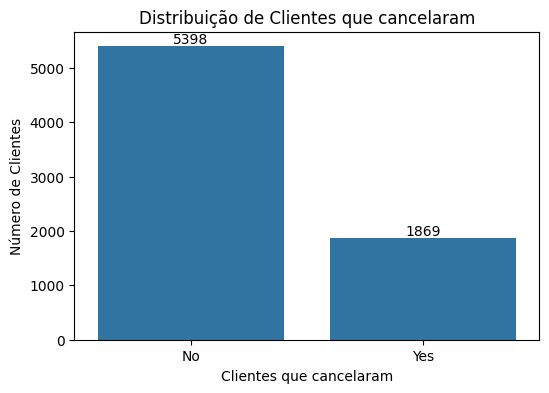

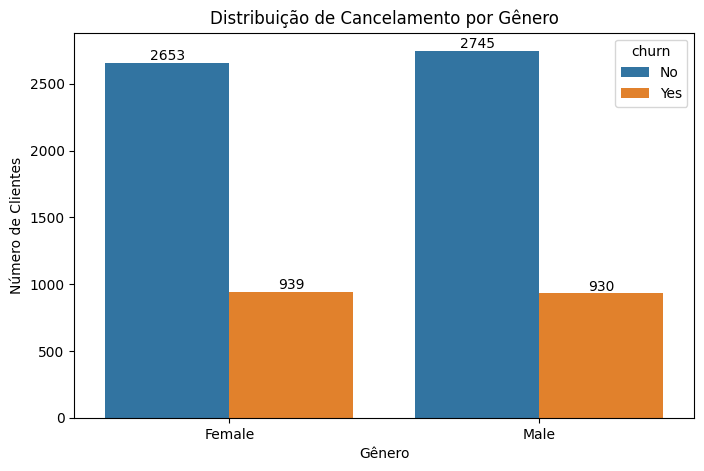

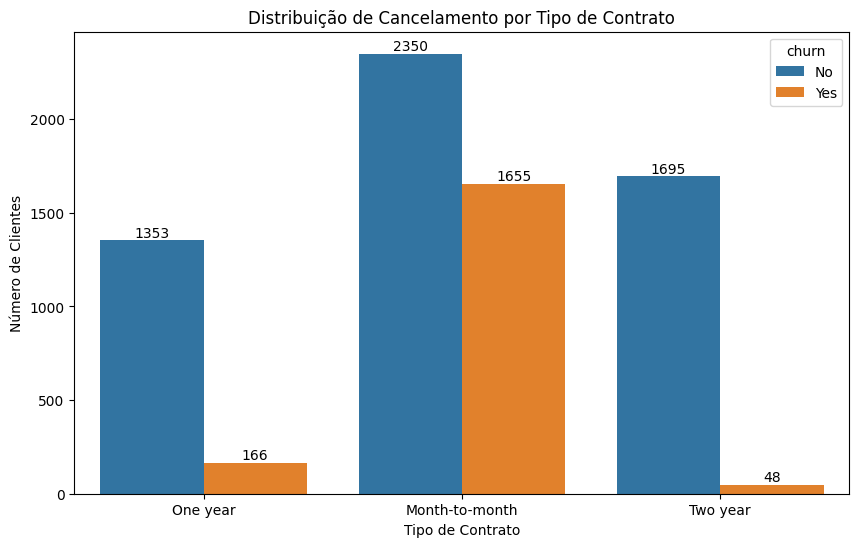

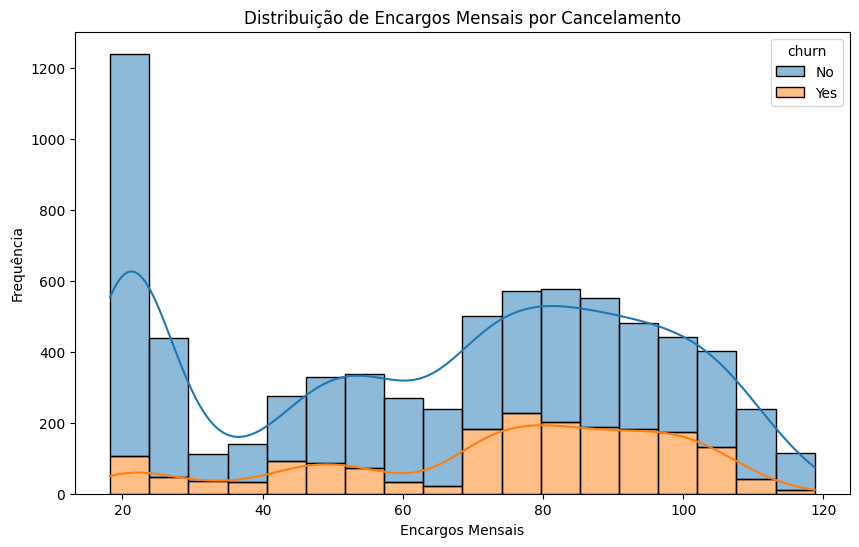

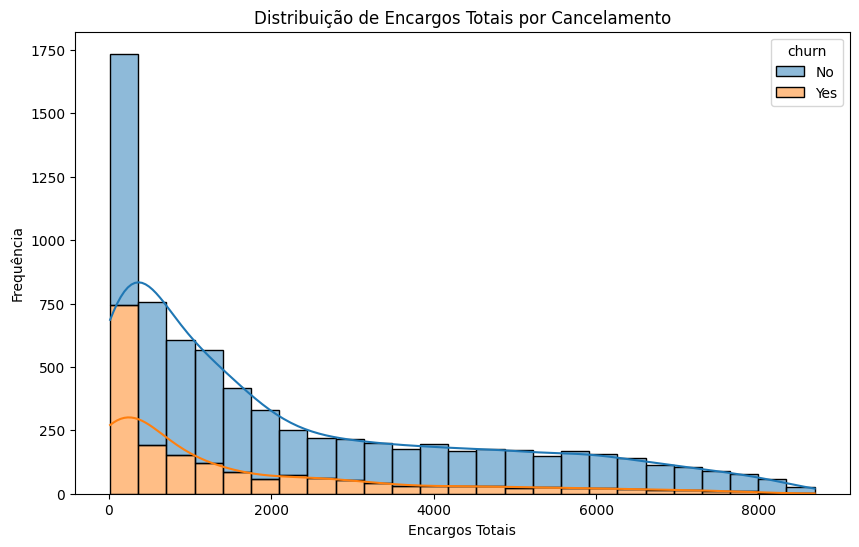

In [128]:
# Plotando gráficos com os nomes dos valores binários

# Distribuição de Churn
churn_counts_viz = df_viz['churn'].value_counts()

plt.figure(figsize=(6, 4))
ax1 = sns.barplot(x=churn_counts_viz.index, y=churn_counts_viz.values)
plt.title('Distribuição de Clientes que cancelaram')
plt.xlabel('Clientes que cancelaram')
plt.ylabel('Número de Clientes')
# Adicionar valores sobre as barras
for container in ax1.containers:
    ax1.bar_label(container)
plt.show()

# Distribuição de churn por genero
plt.figure(figsize=(8, 5))
ax2 = sns.countplot(x='gender', hue='churn', data=df_viz)
plt.title('Distribuição de Cancelamento por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Número de Clientes')
# Adicionar valores sobre as barras
for container in ax2.containers:
    ax2.bar_label(container)
plt.show()

# Distribuição de churn por tipo de contrato (esta coluna não foi convertida para binário, usa os valores originais)
plt.figure(figsize=(10, 6))
ax3 = sns.countplot(x='contract', hue='churn', data=df_viz) # Usamos df_viz para o hue 'churn' mapeado
plt.title('Distribuição de Cancelamento por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Número de Clientes')
# Adicionar valores sobre as barras
for container in ax3.containers:
    ax3.bar_label(container)
plt.show()

# Distribuição Mensal de encargos por Clientes que cancelaram e que não cancelaram
# Para este gráfico, usamos os valores numéricos originais para 'charges.monthly' e o 'churn' mapeado para o hue
plt.figure(figsize=(10, 6))
sns.histplot(data=df_viz, x='charges.monthly', hue='churn', multiple="stack", kde=True)
plt.title('Distribuição de Encargos Mensais por Cancelamento')
plt.xlabel('Encargos Mensais')
plt.ylabel('Frequência')
plt.show()

# Distribuição do Total Encargoss por Clientes que cancelaram e que não cancelaram
# Para este gráfico, usamos os valores numéricos originais para 'charges.total' e o 'churn' mapeado para o hue
plt.figure(figsize=(10, 6))
sns.histplot(data=df_viz.dropna(subset=['charges.total']), x='charges.total', hue='churn', multiple="stack", kde=True)
plt.title('Distribuição de Encargos Totais por Cancelamento')
plt.xlabel('Encargos Totais')
plt.ylabel('Frequência')
plt.show()

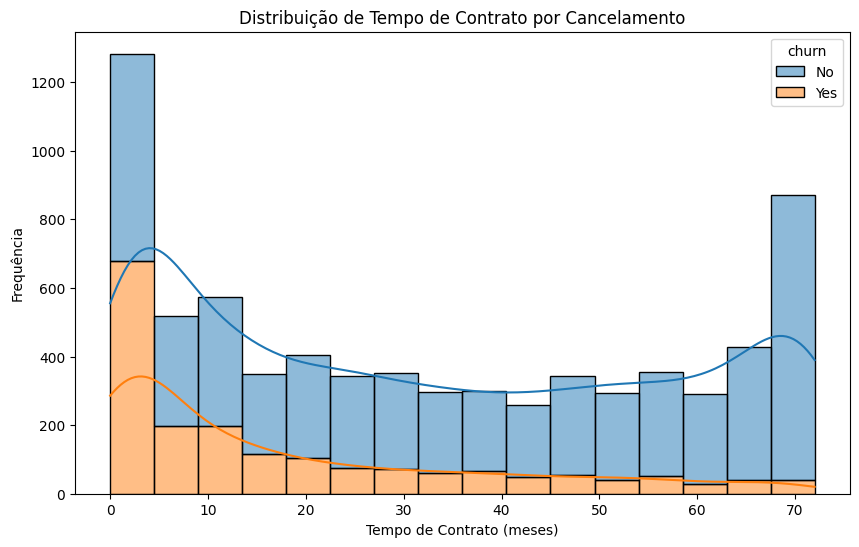


Estatísticas descritivas das variáveis numéricas por Churn:
       tenure                                                     \
        count       mean        std  min   25%   50%   75%   max   
churn                                                              
0      5398.0  37.321045  24.178367  0.0  14.0  37.0  61.0  72.0   
1      1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0   

      charges.monthly             ...                  charges.total  \
                count       mean  ...      75%     max         count   
churn                             ...                                  
0              5398.0  61.354224  ...  88.6375  118.75        5398.0   
1              1869.0  74.441332  ...  94.2000  118.35        1869.0   

                                                                              
              mean          std    min      25%       50%       75%      max  
churn                                                                         


In [129]:
# Variáveis numéricas: Como "total gasto" ou "tempo de contrato", se distribuem entre clientes que cancelaram (evasão) e os que não cancelaram.

import matplotlib.pyplot as plt
import seaborn as sns

# Mapear os valores binários de volta para strings para visualização
df_viz = df.copy()
df_viz['gender'] = df_viz['gender'].map({1: 'Male', 0: 'Female'})
df_viz['seniorcitizen'] = df_viz['seniorcitizen'].map({1: 'Yes', 0: 'No'})
df_viz['partner'] = df_viz['partner'].map({1: 'Yes', 0: 'No'})
df_viz['dependents'] = df_viz['dependents'].map({1: 'Yes', 0: 'No'})
df_viz['phoneservice'] = df_viz['phoneservice'].map({1: 'Yes', 0: 'No'})
df_viz['multiplelines'] = df_viz['multiplelines'].map({1: 'Yes', 0: 'No'})
df_viz['onlinesecurity'] = df_viz['onlinesecurity'].map({1: 'Yes', 0: 'No'})
df_viz['onlinebackup'] = df_viz['onlinebackup'].map({1: 'Yes', 0: 'No'})
df_viz['deviceprotection'] = df_viz['deviceprotection'].map({1: 'Yes', 0: 'No'})
df_viz['techsupport'] = df_viz['techsupport'].map({1: 'Yes', 0: 'No'})
df_viz['streamingtv'] = df_viz['streamingtv'].map({1: 'Yes', 0: 'No'})
df_viz['streamingmovies'] = df_viz['streamingmovies'].map({1: 'Yes', 0: 'No'})
df_viz['paperlessbilling'] = df_viz['paperlessbilling'].map({1: 'Yes', 0: 'No'})
df_viz['churn'] = df_viz['churn'].map({1: 'Yes', 0: 'No'}) # Mapear a variável alvo para visualização

# Distribuição de 'tenure' (tempo de contrato) por Churn
plt.figure(figsize=(10, 6))
sns.histplot(data=df_viz, x='tenure', hue='churn', multiple="stack", kde=True)
plt.title('Distribuição de Tempo de Contrato por Cancelamento')
plt.xlabel('Tempo de Contrato (meses)')
plt.ylabel('Frequência')
plt.show()

# Análise descritiva das variáveis numéricas por grupo de Churn
print("\nEstatísticas descritivas das variáveis numéricas por Churn:")
print(df.groupby('churn')[['tenure', 'charges.monthly', 'charges.total']].describe())

# 📊 **Relatório da Análise de Evasão de Clientes (Churn) na Telecom X**

#  Introdução
# 📊 **Análise Estratégica de Clientes - TelecomX**
# O objetivo desta análise é investigar os fatores que levam os clientes da Telecom X a cancelar seus serviços, um fenômeno conhecido como Churn. A identificação desses fatores é crucial para que a empresa possa desenvolver estratégias eficazes para reter clientes e, consequentemente, reduzir as taxas de evasão, melhorando a sustentabilidade e rentabilidade do negócio.

#  **Limpeza e Tratamento de Dados**

# O processo de análise começou com a importação dos dados de uma URL. Os dados, inicialmente em formato JSON, foram carregados em um DataFrame Pandas.

# **Passos Realizados:**
# 1.  **Importação:** Leitura do arquivo JSON diretamente da URL.
# 2.  **Normalização:** As colunas aninhadas ('customer', 'phone', 'internet', 'account') foram normalizadas utilizando `json_normalize` e combinadas com o DataFrame principal.
# 3.  **Informações Gerais e Valores Nulos:** Verificação inicial do tipo de dados, contagem de valores nulos e estatísticas descritivas para entender a estrutura e qualidade dos dados.
# 4.  **Limpeza e Padronização:**
#     * Nomes das colunas foram convertidos para letras minúsculas e espaços substituídos por underscores.
#     *   Valores duplicados foram removidos.
#     *   A coluna 'charges.total' foi convertida para numérico, com valores não conversíveis tratados como NaN e preenchidos com a mediana para evitar perda de dados valiosos.
#     *   Valores como 'No internet service' e 'No phone service' em colunas de serviço foram padronizados para 'No' para simplificar a análise categórica.
#     *   Colunas binárias ('Yes'/'No' ou 'Male'/'Female') foram convertidas para representação numérica (1/0) para facilitar cálculos estatísticos e futuras modelagens. A variável alvo 'Churn' também foi convertida para 1 (Sim) e 0 (Não).
# 5.  **Verificação Final:** Nova checagem dos tipos de dados e valores nulos para confirmar a eficácia do tratamento.

#  **Análise Exploratória de Dados**

# Após a limpeza e transformação dos dados, diversas análises foram realizadas para identificar padrões e tendências relacionadas à evasão de clientes. Foram utilizadas visualizações gráficas para tornar os insights mais claros e compreensível.

# **Principais Análises e Visualizações:**

# *   **Distribuição de Churn:** Um gráfico de barras mostrando a proporção de clientes que cancelaram (`Churn = Yes`) versus aqueles que não cancelaram (`Churn = No`). Esta visualização inicial estabelece a base da taxa de evasão no conjunto de dados.

# <br>

# *   **Distribuição de Churn por Gênero:** Gráfico de barras comparando a taxa de Churn entre clientes masculinos e femininos. A análise visual (e a contagem dos valores) sugere que a taxa de churn é relativamente similar entre os gêneros, não sendo este um fator determinante isoladamente.

# <br>

# *   **Distribuição de Churn por Tipo de Contrato:** Gráfico de barras explorando a relação entre o tipo de contrato (Mensal, Um Ano, Dois Anos) e a evasão de clientes. A visualização demonstra claramente que clientes com contratos mensais apresentam uma taxa de churn significativamente maior em comparação com aqueles com contratos de um ou dois anos. Isso indica que contratos de longo prazo são um fator de retenção importante.

# <br>

# *   **Distribuição de Encargos Mensais por Churn:** Um histograma mostrando a distribuição dos encargos mensais para clientes que cancelaram e não cancelaram. O gráfico revela que clientes com encargos mensais mais altos tendem a ter uma maior probabilidade de churn, especialmente na faixa de encargos mais elevados.

# <br>

# *   **Distribuição de Encargos Totais por Churn:** Um histograma que exibe a distribuição dos encargos totais pagos pelos clientes, separados por Churn. Clientes com encargos totais mais baixos (geralmente indicando menor tempo de serviço) mostram uma concentração maior de churn. Isso corrobora a importância do tempo de contrato (tenure) na retenção.

# <br>

# *   **Distribuição de Tempo de Contrato (Tenure) por Churn:** Um histograma que compara a distribuição do tempo que os clientes passaram com a empresa (em meses) para os grupos Churn e Não Churn. O gráfico evidencia que a grande maioria dos clientes que cancelaram o serviço tinham um tempo de contrato relativamente curto. Clientes com maior tempo de contrato demonstram uma taxa de evasão consideravelmente menor.

# <br>

# *   **Estatísticas Descritivas por Churn:** Tabelas resumindo estatísticas importantes (média, mediana, desvio padrão, etc.) para as variáveis numéricas ('tenure', 'charges.monthly', 'charges.total'), segregadas pelos grupos de Churn. Esta análise numérica complementa as visualizações gráficas, confirmando as observações de que clientes que cancelam geralmente têm menor tempo de contrato, encargos mensais mais altos e encargos totais mais baixos.

#  **Conclusões e Insights**

# A análise exploratória de dados revelou insights importantes sobre o comportamento de churn dos clientes da Telecom X:

# *   **Contratos de Curto Prazo (Mensais) são de Alto Risco:** Clientes com contratos mensais são significativamente mais propensos a cancelar o serviço. Isso sugere que a falta de um compromisso de longo prazo facilita a decisão de trocar de provedor.
# *   **Clientes Novos são mais Suscetíveis ao Churn:** Há uma forte correlação inversa entre o tempo de contrato (tenure) e o Churn. Clientes que estão com a empresa por um curto período de tempo são mais propensos a evadir. Isso pode estar relacionado à experiência inicial com o serviço, promessas não cumpridas ou a atração por ofertas concorrentes logo no início.
# *   **Encargos Mensais Elevados Podem Ser um Fator de Churn:** Embora não seja o único fator, clientes que pagam encargos mensais mais altos demonstram uma tendência maior a cancelar. Isso pode indicar insatisfação com o custo do serviço em relação ao valor percebido, ou que estes clientes possuem pacotes mais complexos que podem gerar mais problemas.
# *   **Serviços Adicionais:** Embora não explicitamente detalhado em todos os gráficos incluídos no código fornecido, a análise das colunas de serviço (Online Security, Tech Support, etc. - mesmo que convertidas para binário) durante a exploração inicial pode revelar se a falta de determinados serviços de valor agregado contribui para o churn.

#  **Recomendações**

# Com base nos insights extraídos da análise, as seguintes recomendações são propostas para a Telecom X:

# 1.  **Foco na Retenção de Clientes Novos:** Implementar programas de onboarding e acompanhamento intensivo nos primeiros meses de contrato, especialmente para clientes com contratos mensais. Ofertas especiais ou benefícios adicionais nos primeiros 3-6 meses podem aumentar o engajamento inicial.
# 2.  **Incentivo a Contratos de Longo Prazo:** Desenvolver e promover pacotes com benefícios atraentes para clientes que optarem por contratos de um ou dois anos. Descontos progressivos, serviços adicionais gratuitos por um período, ou melhores condições de equipamentos podem ser diferenciais.
# 3.  **Análise de Preços e Pacotes:** Realizar uma revisão estratégica dos pacotes de serviços e seus respectivos encargos, especialmente para os planos mais caros. Entender a percepção de valor do cliente e comparar com as ofertas da concorrência pode ajudar a ajustar a precificação e reduzir o churn relacionado ao custo.
# 4.  **Fortalecer o Suporte e Serviços de Valor Agregado:** Investigar se a falta de serviços como Suporte Técnico Online ou Segurança Online está correlacionada com o churn. Aprimorar esses serviços e destacar seus benefícios pode aumentar a satisfação do cliente.
# 5.  **Segmentação para Campanhas de Retenção:** Utilizar os insights sobre tempo de contrato, tipo de contrato e encargos para identificar clientes em maior risco de churn. Direcionar campanhas de retenção personalizadas para esses segmentos específicos (e.g., clientes com contrato mensal há 6-12 meses pagando encargos altos).
# 6.  **Monitoramento Contínuo:** Estabelecer um sistema de monitoramento contínuo das métricas de churn e dos fatores identificados. A análise preditiva pode ser implementada na próxima fase para identificar clientes em risco em tempo real e acionar ações proativas.

# Ao implementar essas recomendações, a Telecom X estará em uma posição mais forte para reduzir a taxa de evasão, melhorar a satisfação do cliente e otimizar seus resultados de negócio.

# 📎 *Análise realizada com Python, Pandas, Seaborn e Matplotlib.*